Text(0.5, 1.0, 'Output')

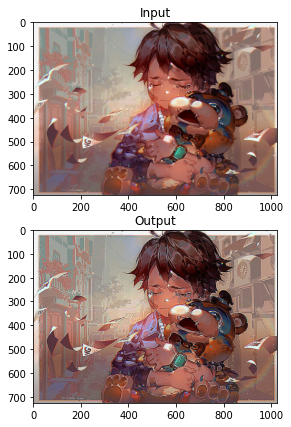

In [ ]:
import cv2

import numpy as np

  

image_in = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset/95830235_p0.jpg")

image_rgb = cv2.cvtColor(image_in, cv2.COLOR_BGR2RGB)

  

kernel2 = np.array([[-1, -1, -1],

                    [-1, 9, -1],

                    [-1, -1, -1]])

  

image_out = cv2.filter2D(src=image_rgb, ddepth=-1, kernel=kernel2)


from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))


fig.add_subplot(2, 1, 1)

plt.imshow(image_rgb)

plt.title("Input")


fig.add_subplot(2, 1, 2)

plt.imshow(image_out)

plt.title("Output")

Text(0.5, 1.0, 'Output')

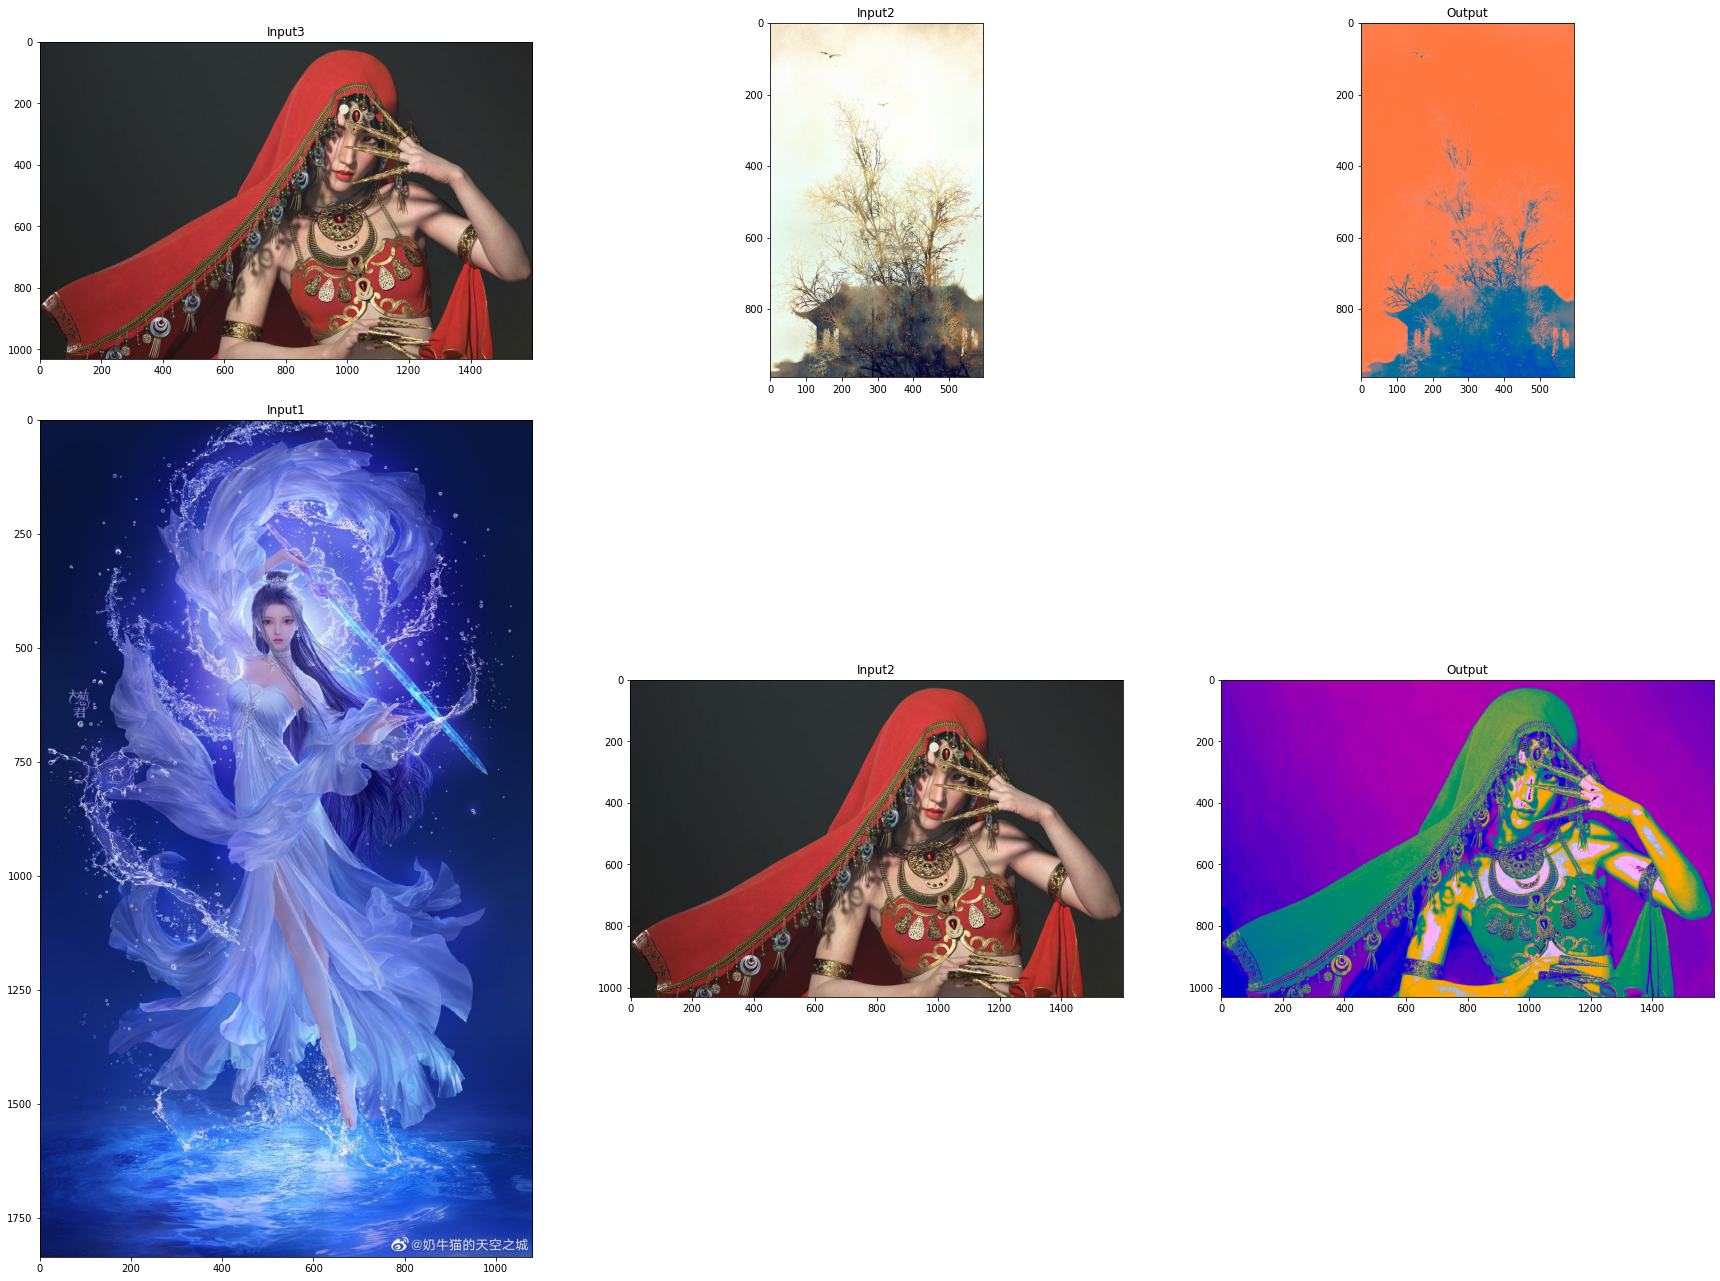

In [ ]:
import cv2

import numpy as np


# Read in 2 input images  

image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/1.jpg')

image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/2.jpg')

image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/3.jpg')


# Step 1: Convert BGR to Lab 

image1_lab = cv2.cvtColor(image1, cv2.COLOR_BGR2LAB).astype("float32") 

image2_lab = cv2.cvtColor(image2, cv2.COLOR_BGR2LAB).astype("float32") 

image3_lab = cv2.cvtColor(image3, cv2.COLOR_BGR2LAB).astype("float32") 


# Step2: Calculate mean and std

mean1, std1 = cv2.meanStdDev(image1_lab)

mean2, std2 = cv2.meanStdDev(image2_lab)

mean3, std3 = cv2.meanStdDev(image3_lab)


# Split into 3 channels

l2, a2, b2 = cv2.split(image2_lab)

l3, a3, b3 = cv2.split(image3_lab)


# Step3: Color transfer

# Channel l

l2 = (l2-mean2[0])*(std1[0]/std2[0])+(mean1[0])

# Channel a

a2 = (l2-mean2[1])*(std2[2]/std1[1])+(mean1[2])

# Channel b

b2 = (l2-mean2[2])*(std2[2]/std1[1])+(mean1[1])

# ********* Put your code here ************

l3 = (l3-mean2[0])*(std2[0]/std3[0])+(mean1[0])
a3 = (l3-mean2[1])*(std2[1]/std2[1])+(mean2[2])
b3 = (l3-mean2[2])*(std2[2]/std1[2])+(mean3[1])

# Clip pixels to [0, 255] 

l2_new = np.clip(l2, 0, 255)

a2_new = np.clip(a2, 0, 255)

b2_new = np.clip(b2, 0, 255)



l3_new = np.clip(l2, 0, 255)

a3_new = np.clip(a3, 0, 255)

b3_new = np.clip(b3, 0, 255)



# Merge all 3 channels

image2_lab_new = cv2.merge([l2, a2, b2]).astype("uint8")

image3_lab_new = cv2.merge([l3, a3, b3]).astype("uint8")


# Step4: Convert lab back to BGR

image2_new = cv2.cvtColor(image2_lab_new, cv2.COLOR_LAB2RGB) 

image3_new = cv2.cvtColor(image3_lab_new, cv2.COLOR_LAB2RGB) 


from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 30))

fig.add_subplot(1, 3, 1)

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) 

plt.imshow(image1_rgb)

plt.title("Input1")


fig.add_subplot(1, 3, 2)

image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) 

plt.imshow(image2_rgb)

plt.title("Input2")


fig.add_subplot(1, 3, 3)

plt.imshow(image2_new)

plt.title("Output")


fig.add_subplot(4, 3, 1)

image3_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) 

plt.imshow(image3_rgb)

plt.title("Input3")


fig.add_subplot(4, 3, 2)

image2_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB) 

plt.imshow(image2_rgb)

plt.title("Input2")


fig.add_subplot(4, 3, 3)

plt.imshow(image3_new)

plt.title("Output")